In [1]:
using DynamicalBilliards
using PyPlot
using Plots
include("./bounce_maps.jl")
using .bounce_maps: l_poly
# , square, shelf, simple_nonconv, simple_nonconv_deep, simple_bit, irrsquare, triangle, smallsquare, smalltriangle, thintriangle, thintriangle2, pent, conv, two_conv, irpent, irpent, poly1, poly2, poly3, tworooms, tworoomsgp, tworooms2, tworooms3, hallway, office, concave_quad_1, concave_quad_2, concave_pent, bigpoly


ffmpeg version 3.3.3 Copyright (c) 2000-2017 the FFmpeg developers
  built with Apple LLVM version 8.1.0 (clang-802.0.42)
  configuration: --prefix=/usr/local/Cellar/ffmpeg/3.3.3 --enable-shared --enable-pthreads --enable-gpl --enable-version3 --enable-hardcoded-tables --enable-avresample --cc=clang --host-cflags= --host-ldflags= --enable-libmp3lame --enable-libx264 --enable-libxvid --enable-opencl --enable-videotoolbox --disable-lzma --enable-vda
  libavutil      55. 58.100 / 55. 58.100
  libavcodec     57. 89.100 / 57. 89.100
  libavformat    57. 71.100 / 57. 71.100
  libavdevice    57.  6.100 / 57.  6.100
  libavfilter     6. 82.100 /  6. 82.100
  libavresample   3.  5.  0 /  3.  5.  0
  libswscale      4.  6.100 /  4.  6.100
  libswresample   2.  7.100 /  2.  7.100
  libpostproc    54.  5.100 / 54.  5.100
Input #0, image2, from './orthogonal_movie/orthogonal_%d.png':
  Duration: 00:01:00.20, start: 0.000000, bitrate: N/A
    Stream #0:0: Video: png, rgba(pc), 720x720 [SAR 3937:3937

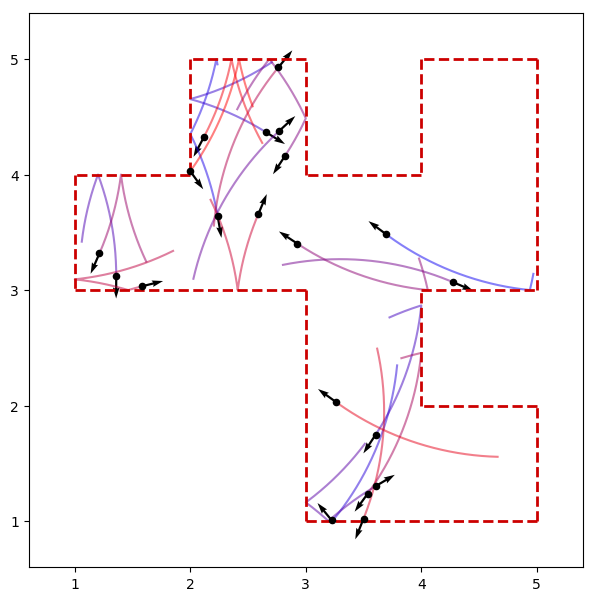

In [169]:
# env 1
polygon_n_vx = 5
polygon_boundary_len = 4.0
polygon_vertex = (r) -> [ [r*cos(2π*i/polygon_n_vx), r*sin(2π*i/polygon_n_vx)] for i in 1:polygon_n_vx]
polygonver = polygon_vertex(polygon_boundary_len)
# env 2
concave_quad = [[2.5,2.5],[0.0,1.0],[-2.5,2.5],[-2.5,-2.5],[2.5,-2.5]]
orthogonal_env = [[5.0, 2.0], [4.0, 2.0], [4.0, 3.0], [5.0, 3.0], [5.0, 5.0], [4.0, 5.0], [4.0, 4.0], [3.0, 4.0], [3.0, 5.0], [2.0, 5.0], [2.0, 4.0], [1.0, 4.0], [1.0, 3.0], [3.0, 3.0], [3.0, 1.0], [5.0, 1.0]]
tangent_bounce_angle = 0.5*pi
angular_vel = -0.4
# Step 1: construct billiard with Splitter Wall
bd = Obstacle{Float64}[]
env_poly = orthogonal_env
for i in eachindex(env_poly)
  starting = env_poly[i]
  ending = env_poly[mod1(i+1, length(env_poly))]
  w = ending - starting
  normal = [-w[2], w[1]]
  wall = SplitterWall(starting, ending, normal, "wall $i")
  push!(bd, wall)
end
bd = Billiard(bd)
# plot(bd)

# Step 2: Define transmission function and refraction function  
# in our case, we never want the transmission happens (yet)
transmission_p(p) = (φ, pflag, ω) -> begin
    0
end
# the refraction would be our bounce angles (with respect to the normal)
refraction(φ, pflag, ω) = tangent_bounce_angle

# Step 3: Assign the transmission function and refraction to each wall
raywall = RaySplitter([1, 2, 3, 4, 5], transmission_p(0), refraction)
# Step 4: Create a particle with initial x, initial y, initial heading angle, angular velocity |w| = 1/r
mp = MagneticParticle(2, 3.5, 2, angular_vel)
N = 20
cs = [(i/N, 0, 1 - i/N, 0.5) for i in 1:N]
ps = [MagneticParticle(2, 3.5+0.005*i, 2, angular_vel) for i in 1:N]
xt, yt, vxt, vyt, tt = timeseries(mp, bd, 1000, (raywall,))
animate_evolution(ps, bd, 60.0, (raywall,), colors = cs, tailtime = 1.5, savename = "./orthogonal_movie/orthogonal");


In [153]:
polygon_vertex = (r) -> [ [r*cos(2π*i/polygon_n_vx), r*sin(2π*i/polygon_n_vx)] for i in 1:(polygon_n_vx+1)]
polygonver = polygon_vertex(polygon_boundary_len)
concave_quad = [[2.5,2.5],[0.0,1.0],[-2.5,2.5],[-2.5,-2.5],[2.5,-2.5], [2.5,2.5]]
orthogonal_env = [[5.0, 2.0], [4.0, 2.0], [4.0, 3.0], [5.0, 3.0], [5.0, 5.0], [4.0, 5.0], [4.0, 4.0], [3.0, 4.0], [3.0, 5.0], [2.0, 5.0], [2.0, 4.0], [1.0, 4.0], [1.0, 3.0], [3.0, 3.0], [3.0, 1.0], [5.0, 1.0], [5.0, 2.0]]

boundary_x = [orthogonal_env[i][1] for i in eachindex(orthogonal_env)]
boundary_y = [orthogonal_env[i][2] for i in eachindex(orthogonal_env)]
Plots.plot(boundary_x, boundary_y, color = :red, linewidth = 3)
alphas = range(0, 1, length = length(xt))
Plots.plot!(xt, yt, seriesalpha = alphas, aspect_ratio = :equal, axis = nothing, ticks = false, foreground_color = :white, color = :blue, linewidth = 2, legend = false)
Plots.scatter!([xt[1]], [yt[1]], color = :black)
Plots.savefig("./billiard_17.png")
# laser beam sensing: example; 
# obstacles: example;
# straight line in normal wall;
# bounce law
# use local version of dynamic billiard

In [4]:
DynamicalBilliards.plot(bd)
fig = PyPlot.plot(xt, yt)
alphas = range(0, 1, length = length(xt))
i = 0
for l in gca()[:lines]
    l[:set_alpha](0.7)
    i = i+1
    print(i)
end
PyPlot.scatter(xt[1], yt[1], color = "black")
PyPlot.savefig("./billiard_5.png")
print("done")

# print("save")
# laser beam sensing: example; 
# obstacles: example;
# straight line in normal wall;
# bounce law
# use local version of dynamic billiard